# Tatoeba translation scores

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
sns.set_palette("deep")

In [148]:
PLOTS_PATH = "../plots"

In [149]:
df = pd.read_csv("../data/tatoeba_train_opus_scores.tsv", sep="\t", index_col=0)

df.sample(10)

,translation,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr
line_idx,,,,,
467917,"Санта живет не на Северном полюсе, а в Финляндии.",0.717766,0.105342,0.086530,4.042317e-02
374646,Мы были удивлены его поведением.,1.000000,0.095472,0.095472,0.000000e+00
464096,"Неудивительно, что его арестовали.",0.274825,0.115713,0.102822,2.703778e-02
380682,Вы в порядке?,0.360645,0.088452,0.259562,2.214034e-01
184126,Он внимателен.,0.248408,0.463113,0.318316,3.861053e-01
220959,Тебе нужно выбраться из своей зоны комфорта.,0.233569,0.097259,0.078604,8.088808e-02
320005,Ты воняешь.,1.000000,0.098110,0.098110,0.000000e+00
245146,Том - руководитель проекта.,1.000000,0.073441,0.073441,5.462258e-14
398978,"Том сказал своей дочери, чтобы она вела себя х...",0.534826,0.138485,0.150401,1.043892e-02


In [150]:
df.describe()

,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr
count,491480.000000,491480.000000,491480.000000,491480.000000
mean,0.492341,0.107655,0.098586,0.043265
std,0.331849,0.066054,0.051993,0.072209
min,0.004618,0.009430,0.009430,0.000000
25%,0.206124,0.066279,0.064505,0.000287
50%,0.379918,0.090802,0.086903,0.012435
75%,0.809107,0.128294,0.118271,0.056258
max,1.000000,1.053983,1.347007,1.332027


In [151]:
from datetime import date
import os

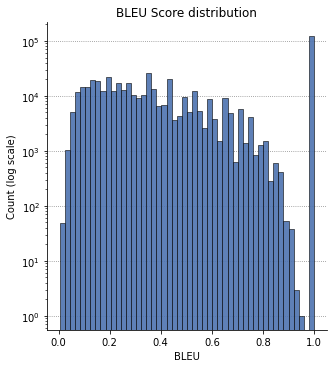

In [140]:
sns.displot(data=df, x="bleu", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="BLEU Score distribution",
    xlabel="BLEU",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"bleu_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

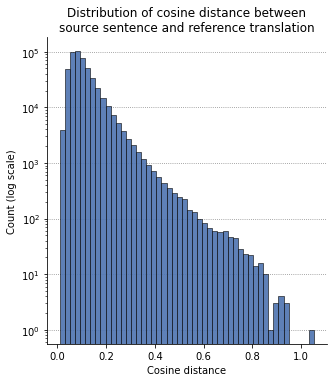

In [141]:
sns.displot(data=df, x="cosine_src_gold", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nsource sentence and reference translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_src_gold_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

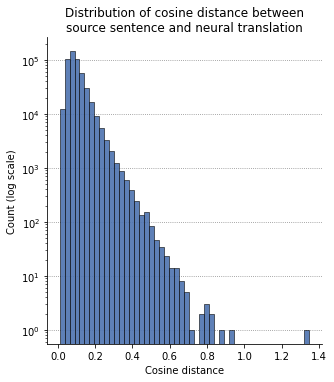

In [142]:
sns.displot(data=df, x="cosine_src_tr", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nsource sentence and neural translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_src_tr_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

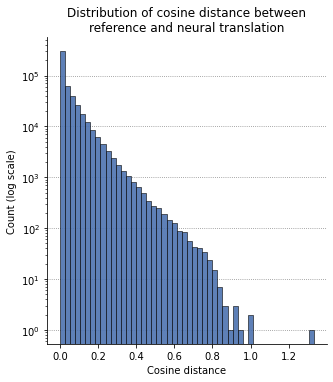

In [143]:
sns.displot(data=df, x="cosine_gold_tr", bins=50, alpha=0.9, zorder=10)

ax = plt.gca()
ax.set_yscale("log")
ax.set(
    title="Distribution of cosine distance between\nreference and neural translation",
    xlabel="Cosine distance",
    ylabel="Count (log scale)",
)

ax.yaxis.grid(linestyle="dotted", color="grey", zorder=0)

plt.savefig(
    os.path.join(PLOTS_PATH, f"cosine_gold_tr_distr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

In [144]:
from matplotlib.colors import LogNorm

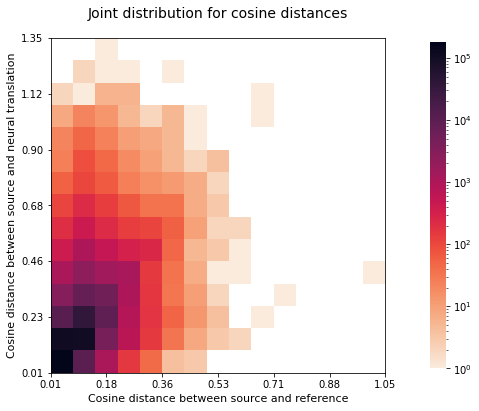

In [155]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_src_gold, df.cosine_src_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between source and reference", fontsize=11)
ax.set_ylabel("Cosine distance between source and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-src_gold-src_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

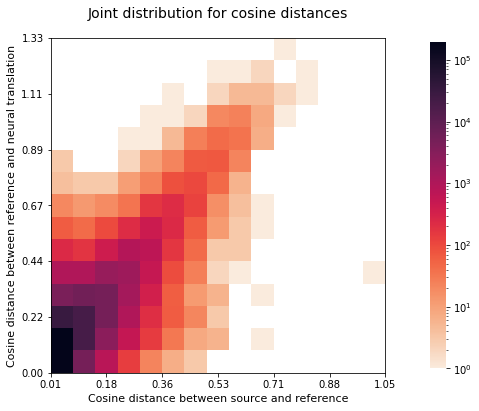

In [159]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_src_gold, df.cosine_gold_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between source and reference", fontsize=11)
ax.set_ylabel("Cosine distance between reference and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-src_gold-gold_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

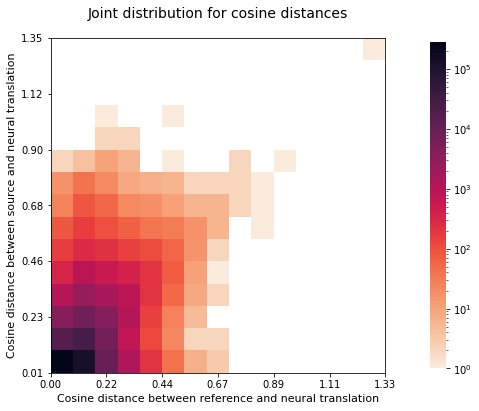

In [160]:
plt.figure(figsize=(8, 8))

map_data, xedges, yedges = np.histogram2d(df.cosine_gold_tr, df.cosine_src_tr, bins=15)

res = sns.heatmap(map_data, cmap="rocket_r", norm=LogNorm(), square=True, cbar_kws=dict(pad=0.1, shrink=0.75))

res.invert_yaxis()
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = plt.gca()
ax.set_title(
    "Joint distribution for cosine distances",
    pad=20,
    fontsize=14,
)
ax.set_xlabel("Cosine distance between reference and neural translation", fontsize=11)
ax.set_ylabel("Cosine distance between source and neural translation", fontsize=11)

ax.tick_params(rotation=0, axis="x")
ax.set_xticks(np.linspace(*ax.get_ylim(), 7))
ax.set_xticklabels(map(lambda x: f"{x:.2f}", np.linspace(xedges[0], xedges[-1], 7)))

ax.tick_params(rotation=0, axis="y")
ax.set_yticks(np.linspace(*ax.get_xlim(), 7))
ax.set_yticklabels(map(lambda x: f"{x:.2f}", np.linspace(yedges[0], yedges[-1], 7)))

plt.savefig(
    os.path.join(PLOTS_PATH, f"joint_distr-gold_tr-src_tr_{date.today()}.pdf"), 
    bbox_inches="tight"
)

In [154]:
print("Correlation between evaluation scores")

df.corr()

Correlation between evaluation scores


,bleu,cosine_src_gold,cosine_src_tr,cosine_gold_tr
bleu,1.000000,-0.266711,-0.180620,-0.475759
cosine_src_gold,-0.266711,1.000000,0.643236,0.705231
cosine_src_tr,-0.180620,0.643236,1.000000,0.469238
cosine_gold_tr,-0.475759,0.705231,0.469238,1.000000


## Separating data into bad translations and good translations

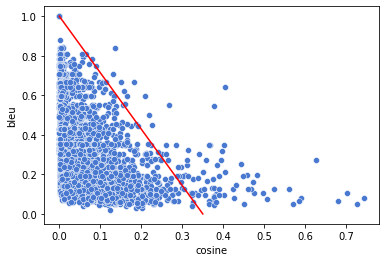

In [46]:
sns.scatterplot(data=df.sample(5000), y="bleu", x="cosine")

plt.plot([0, 0.35], [1, 0], c="r")

plt.show()

In [57]:
cut_df = df[((df.bleu - 20 / 7 * df.cosine) < 0) & (df.bleu > 0.4)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 1293


,translation,cosine,bleu
line_idx,,,
56008,Тома трижды выстрелили в спину.,0.171484,0.430125
463826,Я ценю вашу позицию.,0.157124,0.427287
127272,Том промок.,0.168484,0.451386
337445,Правильные ошибки.,0.204098,0.550321
384134,"Счет, пожалуйста.",0.308525,0.594604
261315,Терпение.,0.470843,0.500000
321257,"Кто-то, должно быть, оставил воду в течении.",0.197078,0.537285
265819,Ясно.,0.260434,0.500000
342076,"Я чувствую, что перевод стал очень неприятным.",0.185114,0.467138


In [96]:
# Zone of idiomes
cut_df = df[df.cosine > 0.8]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 33


,translation,cosine,bleu
68962,"Предвидимая опасность — это опасность, которой...",0.807362,0.049900
426306,Многие хрени делают из хлама.,0.832403,0.081167
98951,У маленьких горшков длинные ручки.,0.806493,0.081167
133332,Многие делают щекотку.,0.926431,0.058764
47231,Дождь идет кошкам и собакам.,0.821410,0.081167
300389,Естественно.,0.823215,0.151633
262133,Это кусок торта.,0.832333,0.159736
423224,Поговорите о дьяволе и он обязательно появится.,0.956265,0.055224
328865,Цепочка не срабатывает на самом слабом звене.,0.806969,0.055224
241218,Вааааааааааааааааааааааааааааааааааааааааааааа...,1.332027,0.067668


In [97]:
# Great translations by both metrics
cut_df = df[(df.cosine < 0.1) & (df.bleu > 0.9)]

print("Example count:", len(cut_df))

cut_df.sample(10)

Example count: 121244


,translation,cosine,bleu
58741,Это все?,0.0,1.0
199553,Я оставил им пару сообщений.,0.0,1.0
41384,Чем я могу ему помочь?,0.0,1.0
325601,Ты любишь слонов.,0.0,1.0
96935,"Мэри сказала мне, что хочет поговорить.",0.0,1.0
454040,Я тоже жил в Гамбурге.,0.0,1.0
122033,Я из Дании.,0.0,1.0
486247,Пора вернуться к реальности.,0.0,1.0
118413,Мы с Томом давно женаты.,0.0,1.0
100606,У него новая девушка.,0.0,1.0
